---   

<img align="left" width="110"   src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg"> 


<h1 align="center">Tools and Techniques for Data Science</h1>
<h1 align="center">Course: Deep Learning</h1>

---
<h3 align="right">Muhammad Sheraz (Data Scientist)</h3>
<h1 align="center">Day33 (Exponentially Weighted Moving Average)</h1>




<div>
<img width='48%'  src='Images/ewma.jpg'>
<img  width='50%' src='Images/ewma_chart.png'>
<img src='Images/farmula_ewma.png'>
<img  src='Images/f21.png'>
<img   src='Images/f3.png'>
</div>


<a href='https://corporatefinanceinstitute.com/resources/career-map/sell-side/capital-markets/exponentially-weighted-moving-average-ewma/#:~:text=The%20Exponentially%20Weighted%20Moving%20Average%20(EWMA)%20is%20a%20quantitative%20or,technical%20analysis%20and%20volatility%20modeling.'>Read here For Detail Lecture</a>

# Exponentially Weighted Moving Average (EWMA)

<img width='45%' align='right' src='Images/ewma.jpg'>

- EWMA is a quantitative or statistical measure used to model or describe a `time series`. The EWMA is widely  used in `finance`, with main applications in technical analysis and volatility modeling.

- The moving average is designed such that `older observations` are given `lower weights`. The weights fall `exponentially` as the data point gets `older` – hence the name exponentially weighted.

- **Role of Alpha:** The only decision a user of the EWMA must make is the parameter `alpha`. The parameter decides how important the current observation is in the calculation of the EWMA. The `higher` the value of alpha, the more `closely` the EWMA tracks the original time series.

## EWMA Formula

The EWMA’s simple mathematical formulation is described below:

<img src='Images/farmula_ewma.png'>



Where:

- `Alpha`: The weight decided by the user
- `r`: Value of the series in the current period


The EWMA is a recursive function, which means that the current observation is calculated using the previous observation. The EWMA’s recursive property leads to the exponentially decaying weights as shown below:

<img src='Images/farmula_ewma.png'>
<img src='Images/f21.png'>
<img src='Images/f3.png'>

The process continues until we reach the base term EWMA0. The equation can be rearranged to show that the EWMAt is the weighted average of all the preceding observations, where the weight of the observation rt–k is given by:

<div align ='center'><img align ='center' src='Images/final_farmula.png'></div>

- Since alpha is between `0` and `1`, the weight becomes `smaller` as `k` becomes `larger`. In other words, as we go back further in history, the weight becomes smaller. The fact is illustrated in the chart below, which plots the weights of observation as k increases for different choices of the parameter alpha.

<img  src='Images/ewma_chart.png'>


### N-Day EWMA

The EWMA can be calculated for a given day range like 20-day EWMA or 200-day EWMA. To compute the moving average, we first need to find the corresponding alpha, which is given by the formula below:


<div align ='center'><img align='center' src='Images/ewma_days.png'></div>

Where:

- N = number of days for which the n-day moving average is calculated

<h3 style="color: green;"">For example, a 15-day moving average’s alpha is given by 2/(15+1), which means alpha is 0.125. Naturally shorter the lookback period – more closely, the EWMA – tracks the original time series.</h3>

### How EWMA is calculated:

- **1.Select a smoothing factor (alpha):** This factor determines the weight given to recent observations. A higher alpha discounts older observations faster.

- **2.Initialize the EWMA:** Set the initial value of the EWMA to the first data point.

- **3.Calculate EWMA for subsequent data points:** For each subsequent data point, compute the EWMA using the formula:


## Exponentially Weighted Moving Average (EWMA) Example

Let's calculate the EWMA for a series of data points using a smoothing factor (\( \alpha \)) of 0.5.

### Data Points

\[ 10, 12, 15, 14, 16, 18 \]

### Calculation

1. **Initialize:** \( EWMA_1 = 10 \).

2. **Calculate for subsequent data points:**

    EWMA2 = α×Value2 + (1−α)×EWMA1
    
    EWMA2 = 0.5×12 + (1−0.5)×10
    EWMA2 = 6 + 5 = 11
    
    For the third data point (15):
    
    EWMA3 = 0.5×15 + (1−0.5)×11
    EWMA3 = 7.5 + 5.5 = 13
    
    For the fourth data point (14):
    
    EWMA4 = 0.5×14 + (1−0.5)×13
    EWMA4 = 7 + 6.5 = 13.5
    
    For the fifth data point (16):
    
    EWMA5 = 0.5×16 + (1−0.5)×13.5
    EWMA5 = 8 + 6.75 = 14.75
    
    For the sixth data point (18):
    
    EWMA6 = 0.5×18 + (1−0.5)×14.75
    EWMA6 = 9 + 7.375 = 16.375

### Results

The EWMA series for the given data points with a smoothing factor of 0.5 is:

\[ 10, 11, 13, 13.5, 14.75, 16.375 \]


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('Datasets/DailyDelhiClimateTest.csv')

In [7]:
df=df[['date','meantemp']]

In [8]:
df

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889
...,...,...
109,2017-04-20,34.500000
110,2017-04-21,34.250000
111,2017-04-22,32.900000
112,2017-04-23,32.875000


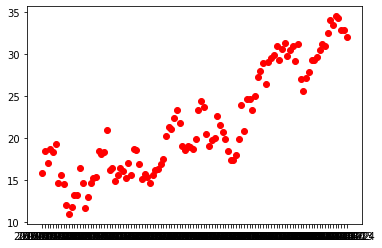

In [10]:
plt.scatter(df['date'],df['meantemp'],color='red');

In [11]:
X1=df['meantemp'].ewm(alpha=0.9).mean()

In [12]:
X1

0      15.913043
1      18.264822
2      17.225443
3      18.552677
4      18.405266
         ...    
109    34.403401
110    34.265340
111    33.036534
112    32.891153
113    32.089115
Name: meantemp, Length: 114, dtype: float64

In [13]:
df['ewma']=X1
df

,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,18.264822
2,2017-01-03,17.111111,17.225443
3,2017-01-04,18.700000,18.552677
4,2017-01-05,18.388889,18.405266
...,...,...,...
109,2017-04-20,34.500000,34.403401
110,2017-04-21,34.250000,34.265340
111,2017-04-22,32.900000,33.036534
112,2017-04-23,32.875000,32.891153


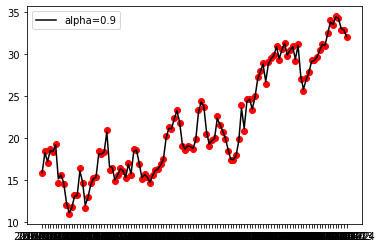

In [14]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],X1,color='black',label='alpha=0.9')
plt.legend()
plt.show()

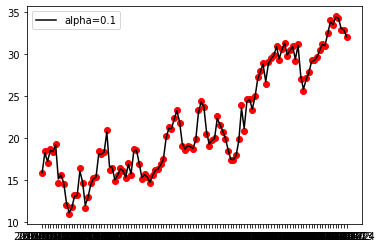

In [15]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],X1,color='black',label='alpha=0.1')
plt.legend()
plt.show();

<h1 align='center'>Interview Questions</h1>

**1. What is Exponentially Weighted Moving Average (EWMA)?**

   **Answer:** 
   Exponentially Weighted Moving Average (EWMA) is a statistical method used to analyze data points over a period of time, giving more weight to recent observations while diminishing the importance of older observations exponentially. It is commonly used in finance, engineering, and signal processing for tasks like time series analysis, forecasting, and noise reduction.

**2. How does EWMA differ from simple moving average?**

   **Answer:** 
   EWMA gives more weight to recent data points while exponentially decreasing the weight of older observations, whereas simple moving average gives equal weight to all data points within the chosen window size. This means EWMA reacts more quickly to recent changes in the data compared to simple moving average.

**3. What is the formula for calculating EWMA?**

   **Answer:** 
   The formula for calculating EWMA is:

   <img src='Images/farmula_ewma.png'>

   Where:
   - EMA_t is the Exponentially Weighted Moving Average at time t.
   - X_t is the observation at time t.
   - α is the smoothing factor (also known as the decay factor), which typically ranges between 0 and 1.

**4. How do you choose the value of the smoothing factor (α) in EWMA?**

   **Answer:** 
   The choice of the smoothing factor depends on the characteristics of the data and the desired responsiveness of the EWMA. A smaller value of α gives more weight to past observations and results in smoother estimates, while a larger value of α puts more emphasis on recent observations, making the estimate more responsive to changes.

**5. What are the advantages of using EWMA?**

   **Answer:** 
   - EWMA reacts quickly to changes in data, making it suitable for detecting and responding to sudden shifts or trends.
   - It provides a smooth estimate of the underlying data by giving more weight to recent observations.
   - It requires minimal computational resources compared to other methods like autoregressive models.

**6. Can EWMA be used for outlier detection?**

   **Answer:** 
   Yes, EWMA can be used for outlier detection by comparing the current observation with the EWMA estimate and identifying deviations beyond a certain threshold. Outliers are often reflected in large deviations between the observed data and the EWMA estimate.

**7. What are the limitations of EWMA?**

   **Answer:** 
   - EWMA relies heavily on the choice of the smoothing factor (α), which may require tuning based on the characteristics of the data.
   - It may not perform well in capturing long-term trends or cyclical patterns present in the data.
   - EWMA assumes that the data follows a stationary process, which may not always hold true in real-world scenarios.
